<h1 style="font-size:30px;text-align:center;color:blue"><b>Titanic Survival Classification</b></h1>

### 01. Problem Statement
 Make a system which tells whether the person
 will be save from sinking. What factors were
 most likely lead to success-socio-economic
 status, age, gender and more.

### 02.Data Collection

In [73]:
#Load the dataset 
import pandas as pd

df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 03.Data Preprocessing

In [74]:
##information
print(df.info())
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


(891, 12)

In [107]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [75]:
df.columns ## for display the columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [76]:
df.duplicated().sum()

0

In [77]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
import matplotlib.pylab as plt
# import missingno as ms

# ms.bar(df,figsize =(10,5),color="blue")
# plt.title("Bar plot showing")


In [79]:
print(df['Embarked'].value_counts())
df['Embarked'].unique()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


array(['S', 'C', 'Q', nan], dtype=object)

In [80]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

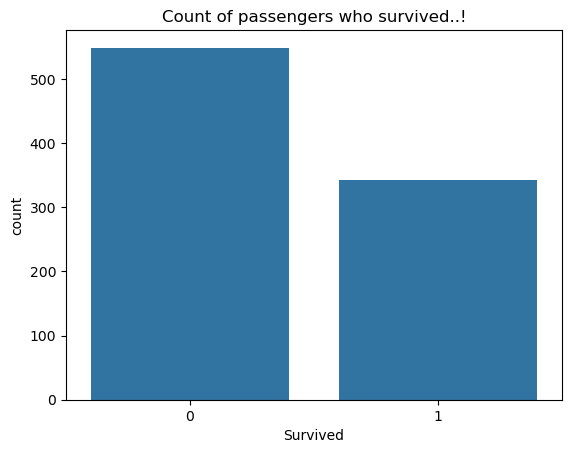

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="Survived",data=df)
plt.title("Count of passengers who survived..!")
plt.show()

Sex
male      577
female    314
Name: count, dtype: int64


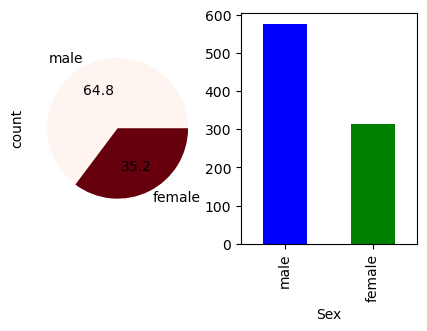

In [82]:
print(df['Sex'].value_counts())
fig,axes=plt.subplots(1,2,figsize=(5,3))
df['Sex'].value_counts().plot(kind='bar', ax=axes[1],color=['blue','green'])
df['Sex'].value_counts().plot(kind='pie',ax=axes[0],autopct='%0.1f',colormap="Reds")
plt.show()

In [105]:
X=df.drop(columns=['Survived','Name','PassengerId','Ticket','Cabin'],axis=1)
y=df['Survived']
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [86]:
## Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
re=LabelEncoder()
X['Sex']=re.fit_transform(X['Sex'])
X['Embarked']=re.fit_transform(X['Embarked'])


In [87]:
X['Age']=X['Age'].fillna(X['Age'].mean())
X['Embarked']=X['Embarked'].fillna(X['Embarked'].mode()[0])
X.isnull().sum()
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2
887,1,0,19.000000,0,0,30.0000,2
888,3,0,29.699118,1,2,23.4500,2
889,1,1,26.000000,0,0,30.0000,0


In [88]:
X.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


C:\Users\SIVA1201\AppData\Local\Temp\ipykernel_10880\1150541285.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] == 1]['Age'], label='Survived')
C:\Users\SIVA1201\AppData\Local\Temp\ipykernel_10880\1150541285.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survive

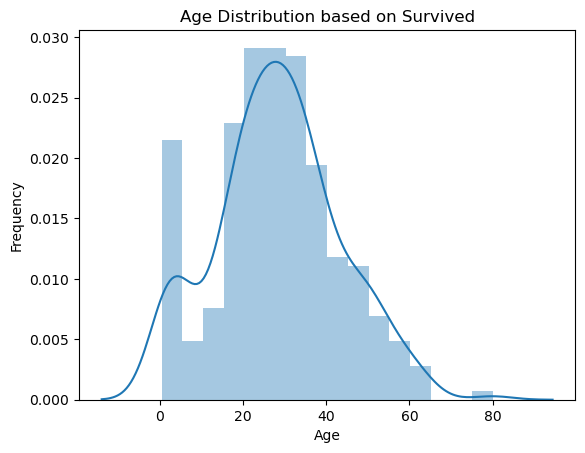

In [94]:
# Display age distribution based on Survived
sns.distplot(df[df['Survived'] == 1]['Age'], label='Survived')
sns.distplot(df[df['Survived'] == 2]['Age'], label = 'not Survived')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution based on Survived')
plt.show()

In [108]:
## Spliting the data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [109]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
495,3,male,NaN,0,0,14.4583,C
648,3,male,NaN,0,0,7.5500,S
278,3,male,7.0,4,1,29.1250,Q
31,1,female,NaN,1,0,146.5208,C
255,3,female,29.0,0,2,15.2458,C
...,...,...,...,...,...,...,...
780,3,female,13.0,0,0,7.2292,C
837,3,male,NaN,0,0,8.0500,S
215,1,female,31.0,1,0,113.2750,C
833,3,male,23.0,0,0,7.8542,S


### 04. Choosing  a Concept(Algorithm)

In [90]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train, y_train)



GaussianNB()

### 05.Model Training

In [91]:
y_pred=model.predict(X_test)
# accurancy
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.7877094972067039


In [92]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[87, 23],
       [15, 54]], dtype=int64)

### 06.Model Evaluation

### 07.Parameter tuning

### 08.Model Prediction

In [106]:
import pickle
# save the model
with open('model.pkl', 'wb') as f: ## you can't use close the file syntax .....!
    pickle.dump(model, f)